# Abundance 

In [46]:
name = 'ms2'

In [47]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_excel( name+'.xlsx')

In [49]:
data.columns

Index(['Unnamed: 0', 'Time', 'Date', 'Latitude', 'Longitude', 'Events',
       'Rx Power (dBm)', 'Agg. Active Ec/Io (dB)', 'Agg. Active RSCP (dBm)'],
      dtype='object')

In [50]:
data = data[['Time', 'Date', 'Latitude', 'Longitude', 'Events',
       'Rx Power (dBm)', 'Agg. Active Ec/Io (dB)', 'Agg. Active RSCP (dBm)']]

In [51]:
data.head()

,Time,Date,Latitude,Longitude,Events,Rx Power (dBm),Agg. Active Ec/Io (dB),Agg. Active RSCP (dBm)
0,09:26:18.293,7/24/2024,6.465325,3.561532,Idle Mode,NaN,NaN,NaN
1,09:27:53.000,7/24/2024,6.465329,3.561529,NaN,-52.000000,-18.1,-70.000000
2,09:27:55.000,7/24/2024,6.465346,3.561518,NaN,-53.700001,-14.6,-69.300003
3,09:27:57.000,7/24/2024,6.465371,3.561504,NaN,-54.000000,-15.7,-69.500000
4,09:27:59.000,7/24/2024,6.465396,3.561494,NaN,-53.700001,-14.6,-68.000000


In [52]:
nsample = data.copy()

## The TIme

In [53]:
from datetime import datetime
START = nsample['Time'].iloc[0].split('.')[0]
print(START)

END = (nsample['Time'].iloc[-1]).split('.')[0]
print(END)

seconds = datetime.strptime(END,'%I:%M:%S') - datetime.strptime(START,'%I:%M:%S')

hours = (seconds.seconds)/3600
print(hours)

09:26:18
10:48:39
1.3725


### Morning and Evening session 

In [54]:
nsample['Sessions'] = nsample['Time'].apply(lambda x: 1 if int(x[:2])<15 else 0 )

In [55]:
nsample.head()

,Time,Date,Latitude,Longitude,Events,Rx Power (dBm),Agg. Active Ec/Io (dB),Agg. Active RSCP (dBm),Sessions
0,09:26:18.293,7/24/2024,6.465325,3.561532,Idle Mode,NaN,NaN,NaN,1
1,09:27:53.000,7/24/2024,6.465329,3.561529,NaN,-52.000000,-18.1,-70.000000,1
2,09:27:55.000,7/24/2024,6.465346,3.561518,NaN,-53.700001,-14.6,-69.300003,1
3,09:27:57.000,7/24/2024,6.465371,3.561504,NaN,-54.000000,-15.7,-69.500000,1
4,09:27:59.000,7/24/2024,6.465396,3.561494,NaN,-53.700001,-14.6,-68.000000,1


## lets group them according to days of the week 

In [56]:
from datetime import datetime
nsample['DOW'] = nsample['Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').strftime('%A'))

In [57]:
nsample.head()

,Time,Date,Latitude,Longitude,Events,Rx Power (dBm),Agg. Active Ec/Io (dB),Agg. Active RSCP (dBm),Sessions,DOW
0,09:26:18.293,7/24/2024,6.465325,3.561532,Idle Mode,NaN,NaN,NaN,1,Wednesday
1,09:27:53.000,7/24/2024,6.465329,3.561529,NaN,-52.000000,-18.1,-70.000000,1,Wednesday
2,09:27:55.000,7/24/2024,6.465346,3.561518,NaN,-53.700001,-14.6,-69.300003,1,Wednesday
3,09:27:57.000,7/24/2024,6.465371,3.561504,NaN,-54.000000,-15.7,-69.500000,1,Wednesday
4,09:27:59.000,7/24/2024,6.465396,3.561494,NaN,-53.700001,-14.6,-68.000000,1,Wednesday


# The number of Events 

In [58]:
nsample['Events'].value_counts()

Measurement Report 1                                  1089
SHO Procedure Complete                                 573
Radio Link Addition                                    278
Radio Link Removal                                     256
Radio Link Replacement                                  51
Idle Mode                                               38
Call Initiation                                         35
Dial End                                                35
Dial Start                                              35
Dedicated Mode                                          34
Measurement Report 2                                    34
Call End                                                33
Voice Call Bearer                                       33
Call Setup                                              33
Call Established                                        33
Call Attempt                                            33
RRC Established                                         

# The Map

In [59]:
cord = [[nsample['Latitude'].values[i],nsample['Longitude'].values[i]] for i in range(len(nsample))]

In [60]:
import folium
m = folium.Map(location=[6.4653285, 3.5615295], zoom_start=10)

folium.PolyLine(
    locations=cord,
    color="#0000FF",
    weight=5,
    opacity = 0.5,
    
    font_size = 90
    
  
).add_to(m)
m
# m.save('map.html')

In [61]:
m.save('map.html')

## Extracting ECIO

In [62]:
nsample.columns

Index(['Time', 'Date', 'Latitude', 'Longitude', 'Events', 'Rx Power (dBm)',
       'Agg. Active Ec/Io (dB)', 'Agg. Active RSCP (dBm)', 'Sessions', 'DOW'],
      dtype='object')

In [63]:
Ecio = nsample[['Time', 'Date', 'Latitude', 'Longitude','Sessions', 'DOW','Agg. Active Ec/Io (dB)']]

In [64]:
Ecio = Ecio.dropna()

In [65]:
Ecio.head()

,Time,Date,Latitude,Longitude,Sessions,DOW,Agg. Active Ec/Io (dB)
1,09:27:53.000,7/24/2024,6.465329,3.561529,1,Wednesday,-18.1
2,09:27:55.000,7/24/2024,6.465346,3.561518,1,Wednesday,-14.6
3,09:27:57.000,7/24/2024,6.465371,3.561504,1,Wednesday,-15.7
4,09:27:59.000,7/24/2024,6.465396,3.561494,1,Wednesday,-14.6
5,09:28:01.000,7/24/2024,6.465421,3.561487,1,Wednesday,-15.0


In [66]:
Ecio.describe()

,Latitude,Longitude,Sessions,Agg. Active Ec/Io (dB)
count,2126.000000,2126.000000,2126.0,2126.000000
mean,6.469254,3.678483,1.0,-12.176482
std,0.006799,0.091742,0.0,3.210750
min,6.443143,3.561484,1.0,-24.500000
25%,6.468066,3.589503,1.0,-14.400000
50%,6.471289,3.656346,1.0,-12.500000
75%,6.473704,3.750673,1.0,-9.900000
max,6.476174,3.844704,1.0,-4.300000


In [67]:
"""

"""

def set_signal(x):
    x = np.round(x)
    if (-x <=8):
        value  = 'Very Good'
    elif(-x>= 9 and -x<=12):
        value  = 'Good'
    elif(-x>=13 and -x<=16):
        value  = 'Fair'
    elif(-x>=17 and -x<=20):
        value  = 'Poor'
    elif(-x>=21):
        value  = 'Very Poor'
    return value

In [68]:
set_signal(-22)

'Very Poor'

In [69]:
Ecio['Legend'] = Ecio['Agg. Active Ec/Io (dB)'].apply(lambda x: set_signal(x))

In [70]:
Ecio.head()

,Time,Date,Latitude,Longitude,Sessions,DOW,Agg. Active Ec/Io (dB),Legend
1,09:27:53.000,7/24/2024,6.465329,3.561529,1,Wednesday,-18.1,Poor
2,09:27:55.000,7/24/2024,6.465346,3.561518,1,Wednesday,-14.6,Fair
3,09:27:57.000,7/24/2024,6.465371,3.561504,1,Wednesday,-15.7,Fair
4,09:27:59.000,7/24/2024,6.465396,3.561494,1,Wednesday,-14.6,Fair
5,09:28:01.000,7/24/2024,6.465421,3.561487,1,Wednesday,-15.0,Fair


In [71]:
Ecio.to_csv(name+'_Ecio.csv')

### Ecio Visualizations 
* 1 map
* 2 Count plot
* 3 DistPlot

In [72]:
import plotly.express as px
import pandas as pd

# Define category-specific colors
Ecio_category_colors = {
    "Very Good": "#31a354",  # Bright Blue
    "Good": "#3182bd",       # Cyan
    "Fair": "#f39c12",       # Gold
    "Poor": "red",       # Magenta
    "Very Poor": "#990000"   # Red
}


fig = px.scatter_mapbox(
    Ecio,
    lat='Latitude',
    lon='Longitude',
    hover_name="DOW",
    hover_data=["DOW", 'Agg. Active Ec/Io (dB)', 'Legend'],
    color='Legend',
    color_discrete_map=Ecio_category_colors,  # Use the defined color map
    zoom=10.8,
    height=350,
    width=950
)
fig.update_traces(marker=dict(size=12,opacity=0.35))
fig.update_layout(
    mapbox=dict(
        center=dict(
            lat=Ecio['Latitude'].mean(),  # Center at the mean latitude
            lon=Ecio['Longitude'].mean()  # Center at the mean longitude
        ),
        zoom=10.8 # Adjust zoom level for better focus on markers
    ),
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.update_layout(
    font=dict(
        size=15  # Increase font size (e.g., 18)
    )
)
fig.show()
fig.write_html(name+"ECIO_visualization.html")

## 2 CountPlot

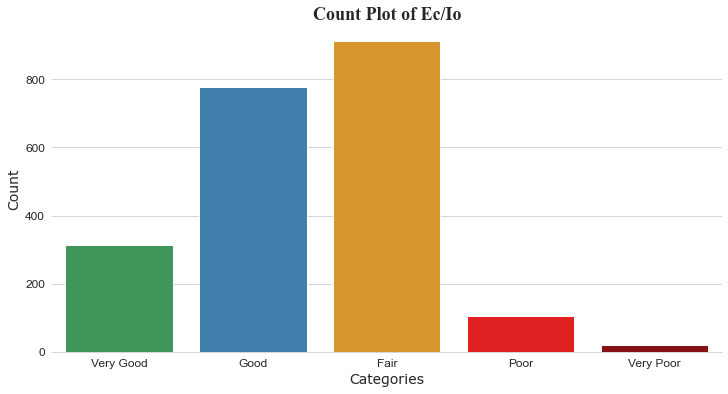

In [73]:

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(data = Ecio, x='Legend',palette=Ecio_category_colors,order = Ecio_category_colors.keys())
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Count Plot of Ec/Io', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('Categories', fontsize=14,fontname='Verdana')
plt.ylabel('Count', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [74]:
Ecio['Legend'].value_counts()

Fair         912
Good         776
Very Good    313
Poor         105
Very Poor     20
Name: Legend, dtype: int64

### 3 DIstplot

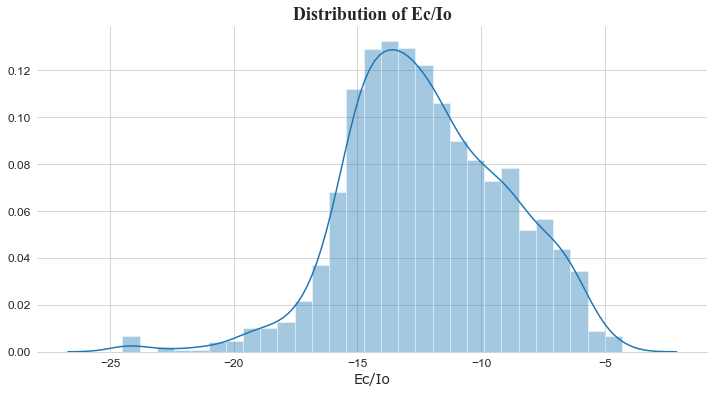

In [75]:
plt.figure(figsize=(12,6))
sns.distplot(Ecio['Agg. Active Ec/Io (dB)'])
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Distribution of Ec/Io', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('Ec/Io', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [76]:
Ecio.describe()

,Latitude,Longitude,Sessions,Agg. Active Ec/Io (dB)
count,2126.000000,2126.000000,2126.0,2126.000000
mean,6.469254,3.678483,1.0,-12.176482
std,0.006799,0.091742,0.0,3.210750
min,6.443143,3.561484,1.0,-24.500000
25%,6.468066,3.589503,1.0,-14.400000
50%,6.471289,3.656346,1.0,-12.500000
75%,6.473704,3.750673,1.0,-9.900000
max,6.476174,3.844704,1.0,-4.300000


## Extracting Rx Power 

In [77]:
RxPower = nsample[['Time', 'Date', 'Latitude', 'Longitude','Sessions', 'DOW','Rx Power (dBm)']]

In [78]:
RxPower = RxPower.dropna()

In [79]:
RxPower

,Time,Date,Latitude,Longitude,Sessions,DOW,Rx Power (dBm)
1,09:27:53.000,7/24/2024,6.465329,3.561529,1,Wednesday,-52.000000
2,09:27:55.000,7/24/2024,6.465346,3.561518,1,Wednesday,-53.700001
3,09:27:57.000,7/24/2024,6.465371,3.561504,1,Wednesday,-54.000000
4,09:27:59.000,7/24/2024,6.465396,3.561494,1,Wednesday,-53.700001
5,09:28:01.000,7/24/2024,6.465421,3.561487,1,Wednesday,-52.299999
...,...,...,...,...,...,...,...
4815,10:48:31.000,7/24/2024,6.472664,3.844677,1,Wednesday,-66.300003
4816,10:48:33.000,7/24/2024,6.472663,3.844678,1,Wednesday,-67.300003
4820,10:48:35.000,7/24/2024,6.472663,3.844679,1,Wednesday,-68.300003
4821,10:48:37.000,7/24/2024,6.472662,3.844680,1,Wednesday,-65.500000


In [80]:
def set_Rxpower(value):
    if value >= -50:
        return "Excellent"
    elif -70 <= value < -50:
        return "Very Good"
    elif -85 <= value < -70:
        return "Good"
    elif -100 <= value < -85:
        return "Fair"
    else:
        return "Poor"

    return value

In [81]:
RxPower['Legend'] = RxPower['Rx Power (dBm)'].apply(set_Rxpower)

In [82]:
RxPower['Legend'].value_counts()

Very Good    1300
Excellent     799
Good           30
Name: Legend, dtype: int64

In [83]:
RxPower.to_csv(name+'_RxPower.csv')

### RxPower Visualizations
* 1 map
* 2 Count plot

In [106]:
import plotly.express as px
import pandas as pd

# Define category-specific colors
RxPower_category_colors = {
    "Excellent": "#31a354",  # Bright Blue
    "Very Good": "#3182bd",       # Cyan
    "Good": "#f39c12",       # Gold
    "Fair": "red",       # Magenta
    "Poor": "#990000"   # Red
}

fig = px.scatter_mapbox(
    RxPower,
    lat='Latitude',
    lon='Longitude',
    hover_name="DOW",
    hover_data=["DOW", 'Rx Power (dBm)', 'Legend'],
    color='Legend',
    color_discrete_map=RxPower_category_colors,  # Use the defined color map
    zoom=10.8,
    height=350,
    width=950
)
fig.update_traces(marker=dict(size=12,opacity=0.35))
fig.update_layout(
    mapbox=dict(
        center=dict(
            lat=RxPower['Latitude'].mean(),  # Center at the mean latitude
            lon=RxPower['Longitude'].mean()  # Center at the mean longitude
        ),
        zoom=10.8 # Adjust zoom level for better focus on markers
    ),
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.update_layout(
    font=dict(
        size=15  # Increase font size (e.g., 18)
    )
)
fig.show()
fig.write_html(name+"Rx Power_visualization.html")

## 2. Countplot

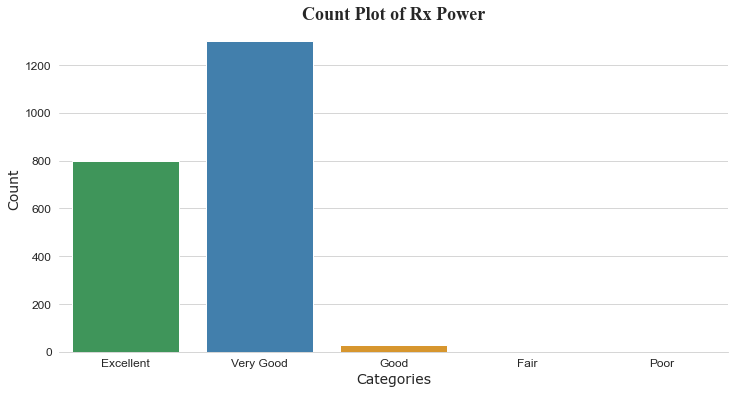

In [104]:

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(data = RxPower, x='Legend',palette=RxPower_category_colors,order = RxPower_category_colors.keys())
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Count Plot of Rx Power', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('Categories', fontsize=14,fontname='Verdana')
plt.ylabel('Count', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


## 3. DIstplot

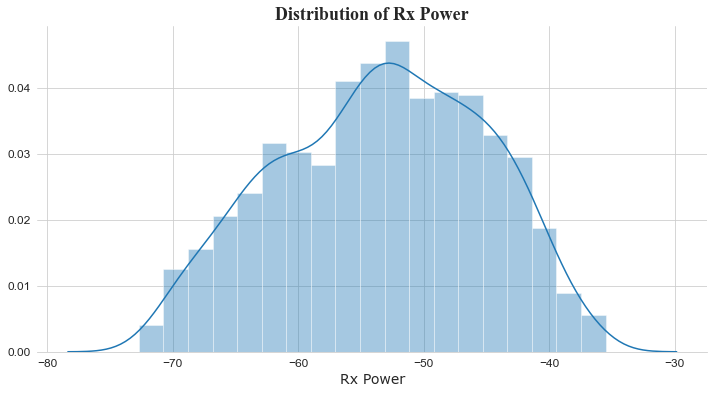

In [105]:
plt.figure(figsize=(12,6))
sns.distplot(RxPower['Rx Power (dBm)'])
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Distribution of Rx Power', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('Rx Power', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [87]:
RxPower.describe()

,Latitude,Longitude,Sessions,Rx Power (dBm)
count,2129.000000,2129.000000,2129.0,2129.000000
mean,6.469265,3.678887,1.0,-53.378488
std,0.006801,0.091841,0.0,8.251505
min,6.443143,3.561484,1.0,-72.699997
25%,6.468061,3.589506,1.0,-59.599998
50%,6.471293,3.657332,1.0,-53.000000
75%,6.473724,3.751163,1.0,-46.900002
max,6.476174,3.844704,1.0,-35.500000


# Extracting RSCP

In [88]:
nsample.columns

Index(['Time', 'Date', 'Latitude', 'Longitude', 'Events', 'Rx Power (dBm)',
       'Agg. Active Ec/Io (dB)', 'Agg. Active RSCP (dBm)', 'Sessions', 'DOW'],
      dtype='object')

In [89]:
Rscp = nsample[['Time', 'Date', 'Latitude', 'Longitude','Sessions', 'DOW','Agg. Active RSCP (dBm)']]

In [90]:
Rscp = Rscp.dropna()

In [91]:
Rscp.head()


,Time,Date,Latitude,Longitude,Sessions,DOW,Agg. Active RSCP (dBm)
1,09:27:53.000,7/24/2024,6.465329,3.561529,1,Wednesday,-70.000000
2,09:27:55.000,7/24/2024,6.465346,3.561518,1,Wednesday,-69.300003
3,09:27:57.000,7/24/2024,6.465371,3.561504,1,Wednesday,-69.500000
4,09:27:59.000,7/24/2024,6.465396,3.561494,1,Wednesday,-68.000000
5,09:28:01.000,7/24/2024,6.465421,3.561487,1,Wednesday,-66.300003


In [92]:
def set_it(x):
    x = np.round(x)
    if (-x <= 60):
        value  = 'Very Good'
    elif(-x>=61 and -x<=75):
        value  = 'Good'
    elif(-x>=76 and -x<=85):
        value  = 'Fair'
    elif(-x>=86 and -x<=95):
        value  = 'Poor'
    elif(-x>=96 and -x<=124):
        value  = 'Very Poor'

    return value

In [93]:
set_it(-95)

'Poor'

In [94]:
Rscp['Legend'] = Rscp['Agg. Active RSCP (dBm)'].apply(set_it)

In [95]:
Rscp['Legend'].value_counts()

Good         1176
Very Good     628
Fair          280
Poor           39
Very Poor       3
Name: Legend, dtype: int64

In [96]:
Rscp.to_csv(name+'_Rscp.csv')

## Rscp Visualization 

* 1 Map
* 2 Count plot
* Hist plot


### 1 Map

In [97]:
import plotly.express as px
import pandas as pd

# Define category-specific colors
Rscp_category_colors = {
    "Very Good": "#31a354",  # Bright Blue
    "Good": "#3182bd",       # Cyan
    "Fair": "#f39c12",       # Gold
    "Poor": "red",       # Magenta
    "Very Poor": "#990000"   # Red
}

fig = px.scatter_mapbox(
    Rscp,
    lat='Latitude',
    lon='Longitude',
    hover_name="DOW",
    hover_data=["DOW", 'Agg. Active RSCP (dBm)', 'Legend'],
    color='Legend',
    color_discrete_map=Rscp_category_colors,  # Use the defined color map
    zoom=10.8,
    height=350,
    width=950
)
fig.update_traces(marker=dict(size=12,opacity=0.35))
fig.update_layout(
    mapbox=dict(
        center=dict(
            lat=Rscp['Latitude'].mean(),  # Center at the mean latitude
            lon=Rscp['Longitude'].mean()  # Center at the mean longitude
        ),
        zoom=10.8 # Adjust zoom level for better focus on markers
    ),
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.update_layout(
    font=dict(
        size=15  # Increase font size (e.g., 18)
    )
)
fig.show()
fig.write_html(name+"RSCP_visualization.html")

### 2 Count Plot 

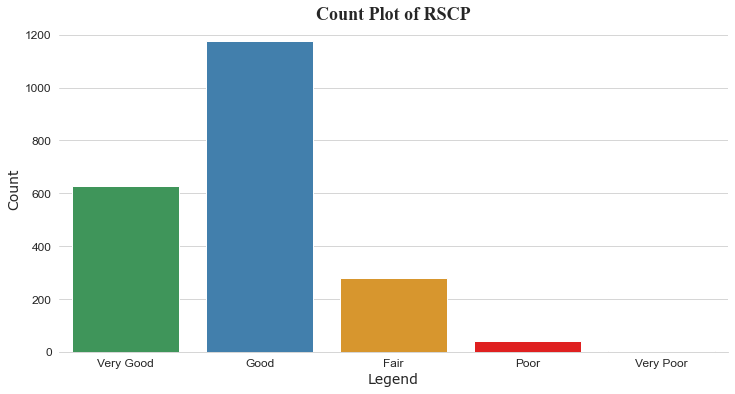

In [98]:

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(data = Rscp, x='Legend',palette=Rscp_category_colors,order = Rscp_category_colors.keys())
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Count Plot of RSCP', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('Legend', fontsize=14,fontname='Verdana')
plt.ylabel('Count', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


### DIstplot

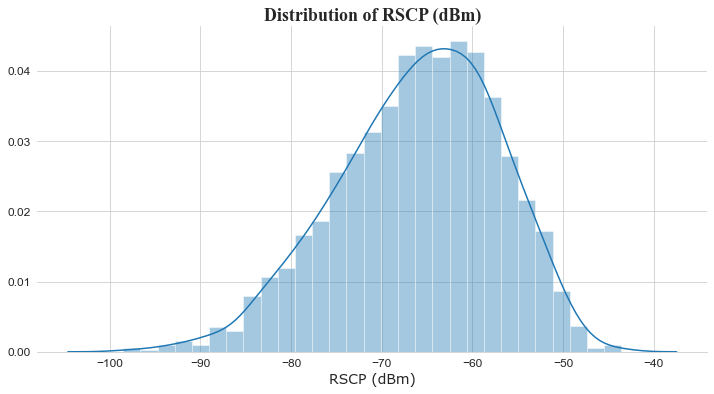

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(Rscp['Agg. Active RSCP (dBm)'])
sns.despine(top=True, right=True, left = True)

# Add title and labels with professional font sizes
plt.title('Distribution of RSCP (dBm)', fontsize=18, fontweight='bold',fontname='Times New Roman')
plt.xlabel('RSCP (dBm)', fontsize=14,fontname='Verdana')

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [100]:
Rscp.describe()

,Latitude,Longitude,Sessions,Agg. Active RSCP (dBm)
count,2126.000000,2126.000000,2126.0,2126.000000
mean,6.469254,3.678483,1.0,-65.996002
std,0.006799,0.091742,0.0,8.893451
min,6.443143,3.561484,1.0,-98.500000
25%,6.468066,3.589503,1.0,-71.800003
50%,6.471289,3.656346,1.0,-65.199997
75%,6.473704,3.750673,1.0,-59.500000
max,6.476174,3.844704,1.0,-43.599998


# Experiment 

In [101]:
import plotly.express as px
import pandas as pd

# Define category-specific colors
category_colors = {
    "Very Good": "green",
    "Good": "blue",
    "Fair": "orange",
    "Poor": "Yellow",
    "Very Poor": "red"
}

fig = px.scatter_mapbox(
    Ecio,
    lat='Latitude',
    lon='Longitude',
    hover_name="DOW",
    hover_data=["DOW", 'Agg. Active Ec/Io (dB)', 'Legend'],
    color='Legend',
    color_discrete_map=category_colors,  # Use the defined color map
    zoom=10.8,
    height=350,
    width=950
)
fig.update_traces(marker=dict(size=12,opacity=0.35))
fig.update_layout(
    mapbox=dict(
        center=dict(
            lat=Ecio['Latitude'].mean(),  # Center at the mean latitude
            lon=Ecio['Longitude'].mean()  # Center at the mean longitude
        ),
        zoom=10.8 # Adjust zoom level for better focus on markers
    ),
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.update_layout(
    font=dict(
        size=15  # Increase font size (e.g., 18)
    )
)
fig.show()
fig.write_html("map_visualization.html")